# Import Data

### Collaborators:
*   Thomas Herren
*   Dinusha Lokuliyana
*   Gilbert Wong


Can we predict whether it is going to rain tomorrow from weather data obtained today? This dataset contains daily weather observations from numerous Australian weather stations. The target variable RainTomorrow means: Did it rain the next day? Yes or No.

We are going to train diffrent binary classification algorithms from the supervised dataset provided and determine how accurate we can predict if it is going to rain tomorrow given today's weather conditions. Let's begin.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting

# Import dataset. Data set is saved in the git repo specified.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


url = 'https://raw.githubusercontent.com/dinushawiki/predicting_rainfall/master/weatherAUS.csv'
df = pd.read_csv(url)
print('Dataset dimensions: ', df.shape)

Dataset dimensions:  (142193, 24)


## Data Fields

* Date: The date of observation
* Location: The common name of the location of the weather station
* MinTemp: The minimum temperature in degrees celsius
* MaxTemp: The maximum temperature in degrees celsius
* Rainfall: The amount of rainfall recorded for the day in mm
* Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine: The number of hours of bright sunshine in the day.
* WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am: Direction of the wind at 9am
* WindDir3pm: Direction of the wind at 3pm
* WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am: Humidity (percent) at 9am
* Humidity3pm: Humidity (percent) at 3pm
* Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
* Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
* Temp9am: Temperature (degrees C) at 9am
* Temp3pm: Temperature (degrees C) at 3pm
* RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RISK_MM: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".
* RainTomorrow: The target variable. Did it rain tomorrow?

# Explore the Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [3]:
#check the counts for each column to check if the dataset is complete
df.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindDir9am       132180
WindGustDir      132863
WindGustSpeed    132923
WindDir3pm       138415
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
RainToday        140787
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
Location         142193
RISK_MM          142193
RainTomorrow     142193
dtype: int64

From above we can see that Sunshine, Evaporation, Cloud3pm, and Cloud9am columns have less than 60% of the rows populated. So let's drop these columns. Also drop Risk_MM as this indicates  the amount of rainfall in millimeters for the next day. This value is used to determine the target variable "RainTomorrow". So it should be ignored here as this would give the model a false accuracy. 
We will fill the missing values of columns that we didn't drop later

In [4]:
print('Prior to dropping the columns :',df.shape)
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date', 'RISK_MM'],axis=1)
print('After dropping the columns :',df.shape)

Prior to dropping the columns : (142193, 24)
After dropping the columns : (142193, 17)


In [0]:
# split the train and test sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 123)

In [6]:
# Explore the train_set
rain = train_set.copy()
rain.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
41816,17.2,24.7,0.0,NE,39.0,NaN,NE,0.0,28.0,75.0,78.0,1016.8,1014.6,20.8,23.1,No,No
64541,22.2,35.2,0.0,N,72.0,N,S,54.0,31.0,39.0,22.0,1017.4,1018.5,25.3,30.5,No,No
3331,17.9,41.6,0.0,NW,70.0,N,NNW,9.0,35.0,70.0,15.0,1005.0,1001.1,24.0,40.2,No,Yes
127307,18.0,21.1,0.0,NW,54.0,N,SW,31.0,31.0,56.0,44.0,1008.9,1013.7,18.3,18.7,No,No
7653,17.0,33.7,0.0,SSW,33.0,ESE,SSW,17.0,20.0,14.0,4.0,1016.3,1013.3,25.2,32.5,No,No


In [7]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,113255.000000,113495.000000,112632.000000,106284.000000,112674.000000,111639.000000,112333.000000,110863.000000,102578.000000,102607.000000,113043.000000,111573.000000
mean,12.185289,23.229052,2.347040,39.983601,13.997524,18.644443,68.835338,51.475226,1017.637514,1015.242088,16.988114,21.688391
std,6.414853,7.131173,8.503176,13.584857,8.883533,8.818079,19.052106,20.805229,7.105613,7.038133,6.503125,6.951686
min,-8.500000,-4.100000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.000000,-5.100000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000
max,33.900000,47.300000,371.000000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.900000,1039.600000,40.200000,46.700000


All the numerical falls within reasonable ranges Therefore no need to alter any numerical values. Now let's investigate categorical data for any abnormlaities.

In [8]:
rain['WindGustDir'].value_counts()

W      7844
SE     7451
N      7268
E      7244
SSE    7205
S      7126
SW     7103
WSW    7066
SSW    6816
WNW    6467
ENE    6342
NW     6341
ESE    5839
NE     5697
NNW    5273
NNE    5152
Name: WindGustDir, dtype: int64

In [9]:
rain['WindDir9am'].value_counts()

N      9130
SE     7333
E      7311
SSE    7172
NW     6851
S      6791
W      6610
SW     6552
NNE    6332
NNW    6304
ENE    6211
ESE    6067
NE     6037
SSW    5860
WNW    5705
WSW    5474
Name: WindDir9am, dtype: int64

In [10]:
rain['WindDir3pm'].value_counts()

SE     8533
W      7898
S      7698
WSW    7475
SW     7287
SSE    7254
N      6981
WNW    6961
NW     6772
ESE    6685
E      6677
NE     6583
SSW    6379
NNW    6221
ENE    6208
NNE    5120
Name: WindDir3pm, dtype: int64

In [11]:
rain['RainTomorrow'].value_counts()

No     88222
Yes    25532
Name: RainTomorrow, dtype: int64

There aren't any abnormalities or unnecessary categories in the categorical columns. So no need to alter any categorical varaibles.
Let's now investigate the null values in each column. We need to remove or change these null values before training models.

In [12]:
 rain.isnull().sum(axis = 0)

MinTemp            499
MaxTemp            259
Rainfall          1122
WindGustDir       7520
WindGustSpeed     7470
WindDir9am        8014
WindDir3pm        3022
WindSpeed9am      1080
WindSpeed3pm      2115
Humidity9am       1421
Humidity3pm       2891
Pressure9am      11176
Pressure3pm      11147
Temp9am            711
Temp3pm           2181
RainToday         1122
RainTomorrow         0
dtype: int64

It seems that all the columns have null values. Since we don't want to drop lot of data points we need to replace these null values with appropriate values.

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


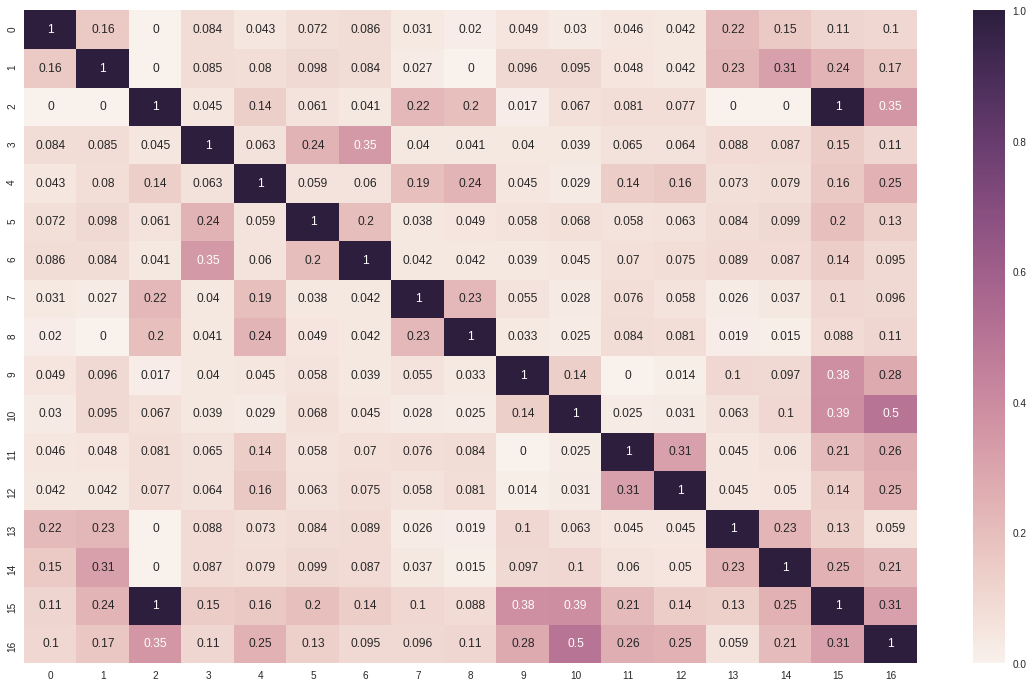

In [13]:
# Correlation Matrix
import scipy.stats as ss
import seaborn as sns

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

headers = list(rain)
print(headers)
coeff_matrix = []
for header in headers:
    coeff_list = []
    for item in headers:
        coeff = cramers_v(rain[header], rain[item])
        coeff_list.append(coeff)
    coeff_matrix.append(coeff_list)
    
np_arr = np.array(coeff_matrix)
plt.figure(figsize=(20,12))
ax = sns.heatmap(np_arr, annot=True)

From the correlation matrix above RainToday seem to have a very high correlation with RainFall, which make sense as RainFall provides the amount of rain we got today. Also RainToday has a high correlation with many other columns in this data set. So let's drop RainToday column.

In [0]:
train_set = train_set.drop("RainToday", axis = 1)

# Prepare the Data

In [0]:
#Alternative to DataframeSelector. Can be replaced later
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
# Create the feature set and target for training
X = train_set.drop("RainTomorrow", axis = 1)
y = train_set["RainTomorrow"].copy()

First let's generate our categorical variable pipeline. For categorical variables we decieded to change the null values to most frequent valuees in the column. We also used OneHotEncoder to encode categorical data.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["WindGustDir", "WindDir9am", "WindDir3pm"])),
        ("imp", SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

For numerical variables we decieded to change the null values to the mean in the column. We also used StandardScaler to normalize numerical values

In [0]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm",
                                              "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"])),
        ("imp", SimpleImputer(missing_values=np.nan, strategy='mean')),
        ('scaler', StandardScaler()),
        ])

In [0]:
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [0]:
X_train_prepared = preprocess_pipeline.fit_transform(X)
y_train_prepared = y.map({'Yes':1, 'No':0})

In [0]:
#Test set
X_test = test_set.drop("RainTomorrow", axis = 1)
y_test = test_set["RainTomorrow"].copy()

X_test_prepared = preprocess_pipeline.fit_transform(X_test)
y_test_prepared = y_test.map({'Yes':1, 'No':0})



# SHORT-LIST PROMISING MODELS and FINE-TUNE THE SYSTEM

In [0]:
#Plt ROC Curve
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, classification_report, roc_auc_score

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

We are choosing roc_auc or area under the ROC curve as the metric to measure the performance of each model. AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting roc_auc is as the probability that the model ranks a random positive example more highly than a random negative example. Positive case here being it will rain tomorrow and negative case being it will not rain tomorrow.

roc_auc is desirable for the following two reasons:

*   roc_auc is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
*   roc_auc is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.

### LogisticRegression

The first classifier to test is Logistic Regression. Logistic regression is appropriate to conduct regression analysis when the dependent variable is dichotomous (binary). This dataset is not very large and we are testing for both l1 and l2 penalties. Therefore ‘liblinear’ is used as the solver. We are tuning the parameters C and penalty of the LogisticRegression classifier.
* C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
* penalty: Used to specify the norm used in the penalization.(‘l1’ or ‘l2’)

Model tuning is commented out as it takes long time to run. Uncomment and run if tuning is necessary 

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

# #tuning
# param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"] }

# #training
# log = LogisticRegression(solver = 'liblinear')
# logreg_cv=GridSearchCV(log,param_grid,cv=5,scoring= 'roc_auc')
# logreg_cv.fit(X_train_prepared,y_train_prepared)
# print(logreg_cv.best_params_)
# print(logreg_cv.best_score_)


The optimal parameters obtained from tuning are {'C': 1.0, 'penalty': 'l1'} with a roc_auc value of 0.85495.

We train the LogisticRegression regression model with given parameters and the training set then test with the test set.

Roc_auc_score 0.8557500501296736


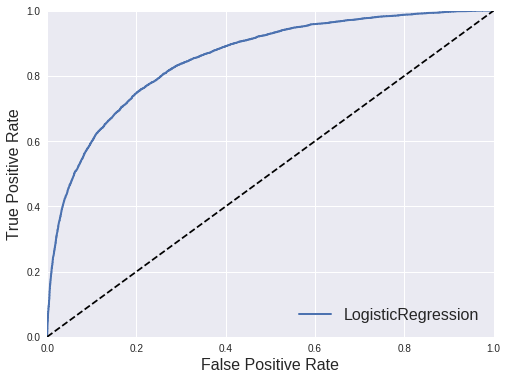

In [24]:
#training
log_best_model = LogisticRegression(C = 1.0, penalty = 'l1', solver = 'liblinear')
log_best_model.fit(X_train_prepared,y_train_prepared)

#testing
y_pred_prob = log_best_model.predict_proba(X_test_prepared)[:,1]
fpr_log, tpr_log, thresholds = roc_curve(y_test_prepared, y_pred_prob, pos_label= 1)
print("Roc_auc_score {}".format(roc_auc_score(y_test_prepared, y_pred_prob)))

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_log, tpr_log, "LogisticRegression")
plt.legend(loc="lower right", fontsize=16)
plt.show()

LogisticRegression classifier gives a roc_auc (area under the curve) value of 0.85575.

### RandomForestClassifier

A random forest is a classifier that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement when bootstrap=True (default). We are tuning the parameters max_depth and n_estimators of the RandomForestClassifier classifier.

* max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* n_estimators: The number of trees in the forest.

In [0]:
from sklearn.ensemble import RandomForestClassifier
# #tuning
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [50, 60 ,70 ,80, 90],
#     'n_estimators': [20, 50, 100, 150, 200]
# }

# rf = RandomForestClassifier(random_state=123)
# rf_cv=GridSearchCV(rf,param_grid,cv=5,scoring= 'roc_auc')
# rf_cv.fit(X_train_prepared,y_train_prepared)
# print(rf_cv.best_params_)
# print(rf_cv.best_score_)

The optimal parameters obtained from tuning are {'bootstrap': True, 'max_depth': 60, 'n_estimators': 300} with a roc_auc value of 0.87432.

We train the RandomForestClassifier classifier with given parameters and the training set then test with the test set.

Roc_auc_score 0.8790019583207875


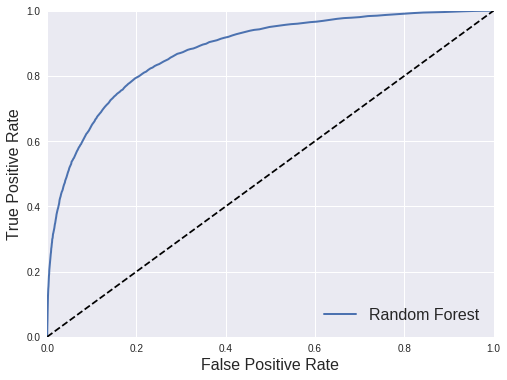

In [26]:
#training
rf_best_model = RandomForestClassifier(bootstrap = True, max_depth = 60, n_estimators = 300, random_state=123)
rf_best_model.fit(X_train_prepared,y_train_prepared)

#testing
y_pred_prob = rf_best_model.predict_proba(X_test_prepared)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_prepared, y_pred_prob, pos_label= 1)
print("Roc_auc_score {}".format(roc_auc_score(y_test_prepared, y_pred_prob)))

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

RandomForestClassifier classifier gives a roc_auc value of 0.87900. RandomForestClassifier gives a higher roc_auc than LogisticRegression. 

In addition to classifying RandomForestClassifier can also be used to determine feature importance. Here we plot the significance of each feature when classying the given features set into positive and negative classes.

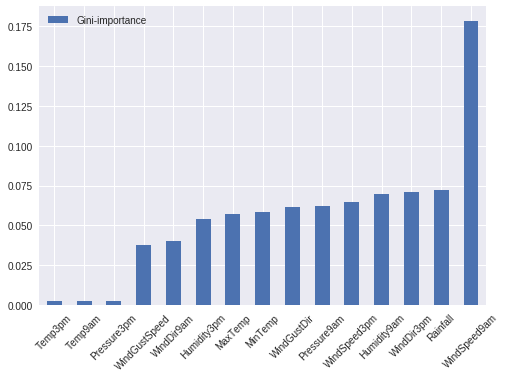

In [27]:
feature_importances = rf_best_model.feature_importances_
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, feature_importances):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

### LGBMClassifier

Light GBM is a gradient boosting framework that uses tree based learning algorithm. It grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm. Parameters assigned are,

* objective: Specifies the application of your model, whether it is a regression problem or classification problem. This is binary classification problem so 'binary' is assigned.
* metric: Specifies loss for model building. 'binary_logloss' is appropriate for loss for binary classification.
* boosting: Defines the type of algorithm you want to run. 'dart' is used for better accuracy.

Parameters tuned are,

* min_data_in_leaf: Setting it to a large value can avoid growing too deep a tree, but may cause under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.
* max_depth: The maximum depth of the tree.
* learning_rate: This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. 





In [0]:
from lightgbm import LGBMClassifier
# #tuning
# param_grid = {
#     "min_data_in_leaf":[50,100,200, 300, 400],
#     "max_depth":[8, 10, 20, 50],
#     "learning_rate": [0.05, 0.1, 0.2, 0.3, 0.4]
# }

# lgbm = LGBMClassifier(application = 'binary', metric = 'binary_logloss', boosting = 'dart')
# lgbm_cv=GridSearchCV(lgbm, param_grid,cv=5,scoring= 'roc_auc')
# lgbm_cv.fit(X_train_prepared,y_train_prepared)
# print(lgbm_cv.best_params_)
# print(lgbm_cv.best_score_)

The optimal parameters obtained from tuning are {'learning_rate': 0.4, 'max_depth': 10, 'min_data_in_leaf': 300} with a roc_auc value of 0.87731.

We train the LGBMClassifier classifier with given parameters and the training set then test with the test set.

Roc_auc_score 0.8782902845874596


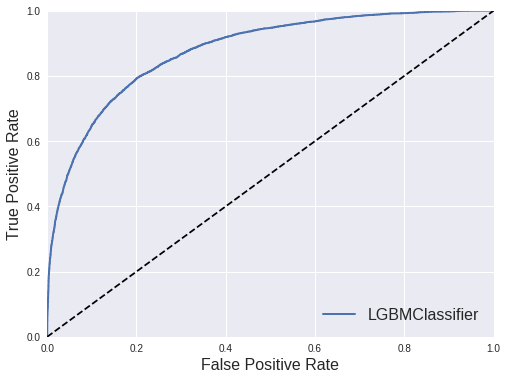

In [29]:
#training
lgbm_best_model = LGBMClassifier(application = 'binary', metric = 'binary_logloss', boosting = 'dart', min_data_in_leaf = 300, max_depth = 10, learning_rate = 0.4)
lgbm_best_model.fit(X_train_prepared,y_train_prepared)

#testing

y_pred_prob = lgbm_best_model.predict_proba(X_test_prepared)[:,1]
fpr_lgbm, tpr_lgbm, thresholds = roc_curve(y_test_prepared, y_pred_prob, pos_label= 1)
print("Roc_auc_score {}".format(roc_auc_score(y_test_prepared, y_pred_prob)))

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_lgbm, tpr_lgbm, "LGBMClassifier")
plt.legend(loc="lower right", fontsize=16)
plt.show()

LGBMClassifier classifier gives a roc_auc value of 0.87829. This is slightly less than RandomForestClassifier. However, LGBMClassifier runs faster than RandomForestClassifier.

# Neural Network

Lastly we try a simple Neural network model to predict If it is going to rain tomorrow. Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. We are using a Sequential Neural Netwrok with nodes and layers. The optimal Neural Network is obtained by chnaging the number of nodes and layers in the model. Then these optimal number of nodes and layers are used to train the Neural network with training data.

First we need to figure out what optimizer to use. Our choices are,

* adam optimizer
* Stochastic gradient descent optimizer with different learning rates.

In [30]:
from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

n_cols =  X_train_prepared.shape[1]
target =  to_categorical(y_train_prepared)

def get_new_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

lr_to_test = [.000001, 0.01, 0.1, 0.2, 0.3]

for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr) 
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy') 
    #model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['binary_accuracy'])
    model.fit(X_train_prepared, target)


# With adam optimizer
print("Testing model with adam optimizer")
model = get_new_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')
model.fit(X_train_prepared, target)

Using TensorFlow backend.




Testing model with learning rate: 0.000001

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
113754/113754 [==============================] - 5s 41us/step - loss: 0.7014


Testing model with learning rate: 0.010000

Epoch 1/1
113754/113754 [==============================] - 4s 37us/step - loss: 0.3860


Testing model with learning rate: 0.100000

Epoch 1/1
113754/113754 [==============================] - 4s 38us/step - loss: 0.3658


Testing model with learning rate: 0.200000

Epoch 1/1
113754/113754 [==============================] - 4s 39us/step - loss: 0.3648


Testing model with learning rate: 0.300000

Epoch 1/1
113754/113754 [==============================] - 4s 39us/step - loss: 0.3659
Testing model with adam optimizer
Epoch 1/1
113754/113754 [==============================] - 5s 46us/step - loss: 0.3623


adam optimizer gives the lowest loss. Therefore we are using the 'adam' optimizer in our deep learning model. Now we need to train the model and validate it. We will increase the number of nodes and layers to get the best posiible validation score possible.

In [31]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2) 

# Without adding any nodes or layers
model = get_new_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_prepared, target, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])


Train on 79627 samples, validate on 34127 samples
Epoch 1/20
79627/79627 [==============================] - 5s 58us/step - loss: 0.3688 - acc: 0.8400 - val_loss: 0.3544 - val_acc: 0.8469
Epoch 2/20
79627/79627 [==============================] - 4s 53us/step - loss: 0.3525 - acc: 0.8482 - val_loss: 0.3539 - val_acc: 0.8482
Epoch 3/20
79627/79627 [==============================] - 4s 52us/step - loss: 0.3462 - acc: 0.8505 - val_loss: 0.3465 - val_acc: 0.8506
Epoch 4/20
79627/79627 [==============================] - 4s 52us/step - loss: 0.3410 - acc: 0.8523 - val_loss: 0.3470 - val_acc: 0.8499
Epoch 5/20
79627/79627 [==============================] - 4s 52us/step - loss: 0.3364 - acc: 0.8548 - val_loss: 0.3437 - val_acc: 0.8518
Epoch 6/20
79627/79627 [==============================] - 4s 52us/step - loss: 0.3325 - acc: 0.8557 - val_loss: 0.3459 - val_acc: 0.8535
Epoch 7/20
79627/79627 [==============================] - 4s 53us/step - loss: 0.3282 - acc: 0.8578 - val_loss: 0.3448 - val_acc

In [32]:
# Increasing the number of nodes
model = Sequential()
model.add(Dense(120, activation='relu', input_shape = (n_cols,)))
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_prepared, target, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])

Train on 79627 samples, validate on 34127 samples
Epoch 1/20
79627/79627 [==============================] - 6s 77us/step - loss: 0.3673 - acc: 0.8399 - val_loss: 0.3565 - val_acc: 0.8485
Epoch 2/20
79627/79627 [==============================] - 6s 70us/step - loss: 0.3524 - acc: 0.8483 - val_loss: 0.3469 - val_acc: 0.8506
Epoch 3/20
79627/79627 [==============================] - 5s 67us/step - loss: 0.3456 - acc: 0.8501 - val_loss: 0.3434 - val_acc: 0.8516
Epoch 4/20
79627/79627 [==============================] - 6s 69us/step - loss: 0.3396 - acc: 0.8534 - val_loss: 0.3438 - val_acc: 0.8511
Epoch 5/20
79627/79627 [==============================] - 6s 70us/step - loss: 0.3346 - acc: 0.8561 - val_loss: 0.3425 - val_acc: 0.8528
Epoch 6/20
79627/79627 [==============================] - 6s 70us/step - loss: 0.3292 - acc: 0.8584 - val_loss: 0.3443 - val_acc: 0.8523
Epoch 7/20
79627/79627 [==============================] - 5s 69us/step - loss: 0.3250 - acc: 0.8593 - val_loss: 0.3446 - val_acc

1. Increasing the number of nodes to 120 decreased the loss of the model. Therefore we are going to use 120 as the number of nodes. Next we are going to increase the number of layers.

In [33]:
# Increasing number of layers
model = Sequential()
model.add(Dense(120, activation='relu', input_shape = (n_cols,)))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_prepared, target, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])

Train on 79627 samples, validate on 34127 samples
Epoch 1/20
79627/79627 [==============================] - 8s 96us/step - loss: 0.3673 - acc: 0.8409 - val_loss: 0.3503 - val_acc: 0.8482
Epoch 2/20
79627/79627 [==============================] - 7s 86us/step - loss: 0.3525 - acc: 0.8474 - val_loss: 0.3504 - val_acc: 0.8502
Epoch 3/20
79627/79627 [==============================] - 7s 92us/step - loss: 0.3461 - acc: 0.8500 - val_loss: 0.3438 - val_acc: 0.8523
Epoch 4/20
79627/79627 [==============================] - 7s 91us/step - loss: 0.3397 - acc: 0.8528 - val_loss: 0.3422 - val_acc: 0.8532
Epoch 5/20
79627/79627 [==============================] - 7s 91us/step - loss: 0.3348 - acc: 0.8551 - val_loss: 0.3476 - val_acc: 0.8498
Epoch 6/20
79627/79627 [==============================] - 7s 90us/step - loss: 0.3300 - acc: 0.8577 - val_loss: 0.3486 - val_acc: 0.8536


Increasing the number of layers did not decrease the loss of the model. Therefore we are using the same number of layers as in the base model.

Train on 79627 samples, validate on 34127 samples
Epoch 1/20
79627/79627 [==============================] - 6s 80us/step - loss: 0.3663 - acc: 0.8406 - val_loss: 0.3499 - val_acc: 0.8490
Epoch 2/20
79627/79627 [==============================] - 6s 71us/step - loss: 0.3514 - acc: 0.8474 - val_loss: 0.3479 - val_acc: 0.8504
Epoch 3/20
79627/79627 [==============================] - 6s 71us/step - loss: 0.3449 - acc: 0.8503 - val_loss: 0.3470 - val_acc: 0.8490
Epoch 4/20
79627/79627 [==============================] - 6s 73us/step - loss: 0.3397 - acc: 0.8530 - val_loss: 0.3434 - val_acc: 0.8530
Epoch 5/20
79627/79627 [==============================] - 6s 71us/step - loss: 0.3346 - acc: 0.8551 - val_loss: 0.3422 - val_acc: 0.8528
Epoch 6/20
79627/79627 [==============================] - 6s 70us/step - loss: 0.3296 - acc: 0.8575 - val_loss: 0.3429 - val_acc: 0.8522
Epoch 7/20
79627/79627 [==============================] - 5s 67us/step - loss: 0.3246 - acc: 0.8603 - val_loss: 0.3447 - val_acc

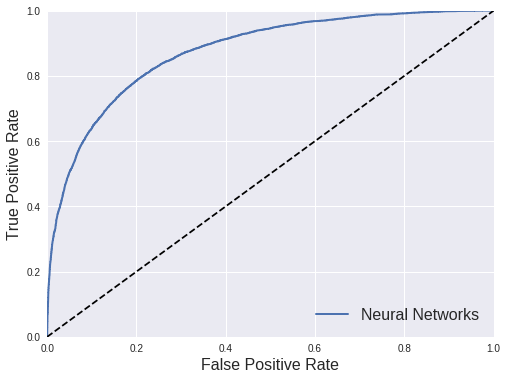

In [34]:
#training
model = Sequential()
model.add(Dense(120, activation='relu', input_shape = (n_cols,)))
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_prepared, target, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor])

#testing
y_pred_prob = model.predict_proba(X_test_prepared)[:,1]
fpr_nn, tpr_nn, thresholds = roc_curve(y_test_prepared, y_pred_prob, pos_label= 1)
print("Roc_auc_score {}".format(roc_auc_score(y_test_prepared, y_pred_prob)))

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_nn, tpr_nn, "Neural Networks")
plt.legend(loc="lower right", fontsize=16)
plt.show()

Neural Network gives a roc_auc value of 0.87765. This is slightly less than both LGBMClassifier and RandomForestClassifier.

# Conclusion

The best classifier to predict if it is going to rain tomorrow given the weather data feature set above is the RandomForestClassifer with parameters {'bootstrap': True, 'max_depth': 60, 'n_estimators': 300}. It gives the bset roc_auc value which provides the highest true positive rate/lowest false negative rate.

Roc_auc_score 0.8790019583207875


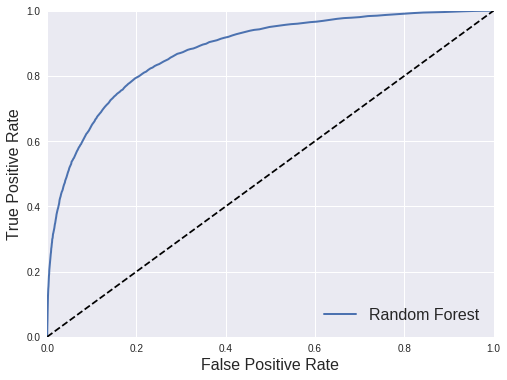

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22094
           1       0.76      0.49      0.60      6345

   micro avg       0.85      0.85      0.85     28439
   macro avg       0.82      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439



In [35]:
from sklearn.metrics import classification_report

# Best model to predict
rf_best_model = RandomForestClassifier(bootstrap = True, max_depth = 60, n_estimators = 300, random_state=123)
rf_best_model.fit(X_train_prepared,y_train_prepared)

y_pred_prob = rf_best_model.predict_proba(X_test_prepared)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test_prepared, y_pred_prob, pos_label= 1)
print("Roc_auc_score {}".format(roc_auc_score(y_test_prepared, y_pred_prob)))

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

print(classification_report(y_test_prepared, rf_best_model.predict(X_test_prepared)))